# Training Model: SVM

## 1. Importing libraries ...

In [1]:
import pandas as pd
import numpy as np
import setup_jwlab
from jwlab.constants import cleaned_data_filepath
from jwlab.ml_prep import prep_ml
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

## 2. Importing Participants data set ...
Note: choose only one of the data set below

#### 2.1 All participants

In [2]:
participants = ["105", "106", "107", "109", "111", "904", "905", "906", "112", "909", "910", "115", "116", "912", "908"]

loaded


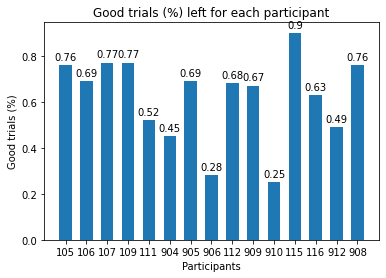

,105,106,107,109,111,904,905,906,112,909,910,115,116,912,908
1,9,7,20,1,3,15,16,5,2,0,1,3,2,1,2
2,9,4,22,3,1,13,15,4,2,2,1,4,0,1,1
3,8,5,24,3,1,12,15,3,1,1,0,4,0,1,3
4,9,6,18,3,2,13,12,6,3,1,0,4,1,0,3
5,-,-,-,3,1,-,-,-,2,1,1,3,0,1,1
6,-,-,-,3,3,-,-,-,3,2,0,5,1,0,1
7,-,-,-,3,2,-,-,-,3,2,1,4,1,1,2
8,-,-,-,2,1,-,-,-,2,1,1,4,1,2,2
9,-,-,-,3,2,-,-,-,1,2,1,4,1,2,2
10,-,-,-,4,3,-,-,-,2,2,0,4,1,1,3


KeyboardInterrupt: 

In [3]:
X, y = prep_ml(cleaned_data_filepath, participants, downsample_num=1000, averaging="no_averaging")

#### 2.2 All 13-month participants

In [2]:
participants = ["105", "106", "107", "109", "111", "112", "115", "116"]

#### 2.3 All 9-month participants

In [2]:
participants = ["904", "905", "906", "909", "910", "912", "908", "913"]

## 3. Generating random subsets of the chosen participant list

In [3]:
participants_train, participants_test = train_test_split(participants,test_size=0.2)
print(len(participants_train), len(participants_test))

12 3


## 4. Preparing the data set for the ML model ...
Note: the dimensions are also verified

#### 4.1 No_averaging data

loaded


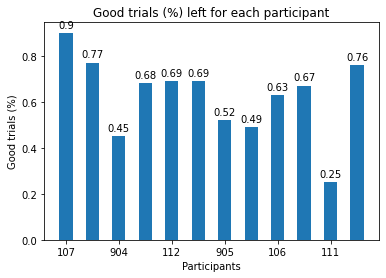


 ----- Printing data for participant - [115] ------ 

The number of BAD trials is - [14].

The number of GOOD trials left is - [122].

The number of GOOD trials left for each WORD is - 
1     3
2     4
3     4
4     4
5     3
6     5
7     4
8     4
9     4
10    4
11    5
12    4
13    4
14    3
15    3
16    5
17    3
18    5
19    3
20    4
21    4
22    2
23    3
24    4
25    5
26    3
27    4
28    4
29    4
30    4
31    3
32    4
dtype: int64

 ----- Printing data for participant - [107] ------ 

The number of BAD trials is - [25].

The number of GOOD trials left is - [84].

The number of GOOD trials left for each WORD is - 
cell
1    20
2    22
3    24
4    18
dtype: int64

 ----- Printing data for participant - [904] ------ 

The number of BAD trials is - [64].

The number of GOOD trials left is - [53].

The number of GOOD trials left for each WORD is - 
cell
1    15
2    13
3    12
4    13
dtype: int64

 ----- Printing data for participant - [112] ------ 

The number of BAD

KeyboardInterrupt: 

In [4]:
X_train_n,y_train_n = prep_ml(cleaned_data_filepath, participants_train, downsample_num=1000, averaging="no_averaging")
X_test_n, y_test_n = prep_ml(cleaned_data_filepath, participants_test, downsample_num=1000, averaging="no_averaging")

# (n_train, d_train) = X_train_n.shape
# assert n_train == y_train_n.shape[0]

# (n_test, d_test) = X_test_n.shape
# assert n_test == y_test_n.shape[0]

#### 4.2 Average_trials

In [5]:
X_train_t, y_train_t = prep_ml(cleaned_data_filepath, participants_train, downsample_num=1000, averaging="average_trials")
X_test_t, y_test_t = prep_ml(cleaned_data_filepath, participants_test, downsample_num=1000, averaging="average_trials")

(n_train, d_train) = X_train_t.shape
assert n_train == y_train_t.shape[0]

(n_test, d_test) = X_test_t.shape
assert n_test == y_test_t.shape[0]

loaded

 ----- Printing data for participant - [109] ------ 

The number of BAD trials is - [25].

The number of GOOD trials left is - [85].

The number of GOOD trials left for each WORD is - 
1     1
2     3
3     3
4     3
5     3
6     3
7     3
8     2
9     3
10    4
11    1
12    3
13    3
14    3
15    2
16    2
17    3
18    2
19    2
20    4
21    3
22    2
23    3
24    1
25    2
26    3
27    2
28    4
29    2
30    3
31    4
32    3
dtype: int64

 ----- Printing data for participant - [112] ------ 

The number of BAD trials is - [33].

The number of GOOD trials left is - [69].

The number of GOOD trials left for each WORD is - 
1     2
2     2
3     1
4     3
5     2
6     3
7     3
8     2
9     1
10    2
11    1
12    1
13    2
14    3
15    2
16    1
17    3
18    3
19    3
20    2
21    2
22    3
23    2
24    1
25    3
26    2
27    2
28    3
29    2
30    2
31    3
32    2
dtype: int64

 ----- Printing data for participant - [909] ------ 

The number of BAD trials is 

KeyboardInterrupt: 

#### 4.3 Average_trials_and_participants

In [ ]:
X_train_tp, y_train_tp = prep_ml(cleaned_data_filepath, participants_train, downsample_num=1000, averaging="average_trials_and_participants")
X_test_tp, y_test_tp = prep_ml(cleaned_data_filepath, participants_test, downsample_num=1000, averaging="average_trials_and_participants")
#(n_train, d_train) = X_train_tp.shape
#assert n_train == y_train_tp.shape[0]

#(n_test, d_test) = X_test_tp.shape
#assert n_test == y_test_tp.shape[0]

In [6]:
X_train_n[0][0].shape

NameError: name 'X_train_n' is not defined

In [9]:
X_train_t.shape

(192, 60000)

In [8]:
X_train_tp.shape

NameError: name 'X_train_tp' is not defined

## 5. Setting up the SVM model ...

In [5]:
model = LinearSVC(C=1e-9, max_iter=1000)

## 6. Training and testing the model ...

In [9]:
print(y_test_n)


[list([             0          1          2          3          4          5  \
0   -30.365461 -10.150289 -11.331446 -16.552408 -28.335586 -10.571514   
1    43.485099  -3.251348   0.411060 -11.423566   9.771688  -7.470434   
2    22.185692  18.354441  21.518878  36.510817  23.690786  36.522364   
3     3.209257 -13.511627 -11.127122   0.041750  17.467095  -7.070573   
4    -3.288182  16.429079  14.399019  -3.482504  37.663264  -5.540013   
..         ...        ...        ...        ...        ...        ...   
243 -46.450927  10.339660  28.288188  16.023199  -0.675248  31.862300   
245  22.770258  40.397485  31.916157   3.617571  14.506172  26.020750   
246  -3.562276 -12.069647 -12.560687 -20.477227 -15.336691 -19.125369   
250 -16.281545 -16.987810   8.139501  40.923125 -27.232067  21.754002   
253  -3.148964  -8.760440  -5.535199   2.862506  -0.207912  -5.235384   

             6          7          8          9  ...      59992      59993  \
0   -16.420266 -12.748386  -6.911270 -

### 6.1 Train on no_average, with error rate ...

In [7]:
for i in range(len(X_train_n)):
    for j in range(len(X_train_n[i])):
        model.fit(X_train_n[i][j], y_train_n[i][j])
        print(np.mean(model.predict(X_test_n[i][j]) != y_test_n[i][j]))

ValueError: Expected 2D array, got 1D array instead:
array=[ 8.  7. 11.  6. 10.  5. 11.  5. 13.  4.  7. 13.  9.  2.  9.  4. 14.  6.
 10.  7.  8. 13.  6.  2. 11. 10.  0.  4.  5.  2.  9.  6.  7. 10.  7.  2.
  0.  5. 13. 14.  5.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 6.2 Train on average_trials, with error rate ...

In [9]:
model.fit(X_train_t, y_train_t)

np.mean(model.predict(X_test_t) != y_test_t)

0.5625

### 6.3 Train on average_trials_and_participants, with error rate ...

In [10]:
model.fit(X_train_tp, y_train_tp)

np.mean(model.predict(X_test_tp) != y_test_tp)

0.5625

In [11]:
X_n.shape

NameError: name 'X_n' is not defined

In [18]:
X_tp.shape

(16, 60000)

In [19]:
X_t.shape

(128, 60000)